# Introduction to Scikit-Learn

In [1]:
what_were_covering = [
    "0. An end-to-end scikit-learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together"]

In [2]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## 0. An end to end Scikit-learn Workflow

In [11]:
import numpy as np

In [3]:
# 1. get data
import pandas as pd
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We will use different features to predict target 1 or 0. If person have a heart disease or not

In [4]:
#create X (feature matrix)
X = heart_disease.drop("target",axis=1)

#create Y (target)
y = heart_disease["target"]

In [6]:
#2.choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

#we'll keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
#3.fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
#make a prediction
y_preds = clf.predict(X_test)

In [13]:
y_preds

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [14]:
y_test

51     1
38     1
206    0
189    0
286    0
      ..
270    0
161    1
135    1
42     1
173    0
Name: target, Length: 61, dtype: int64

In [16]:
#4. Evaluate the model
#don't check on training data because it will show 1 100% score
clf.score(X_test, y_test)

0.7704918032786885

In [17]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [18]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        29
           1       0.75      0.84      0.79        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [19]:
confusion_matrix(y_test, y_preds)

array([[20,  9],
       [ 5, 27]])

In [20]:
accuracy_score(y_test,y_preds)

0.7704918032786885

In [22]:
#5. Improve the model
#try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set: 80.33%

Trying model with 20 estimators..
Model accuracy on test set: 78.69%

Trying model with 30 estimators..
Model accuracy on test set: 77.05%

Trying model with 40 estimators..
Model accuracy on test set: 77.05%

Trying model with 50 estimators..
Model accuracy on test set: 72.13%

Trying model with 60 estimators..
Model accuracy on test set: 80.33%

Trying model with 70 estimators..
Model accuracy on test set: 80.33%

Trying model with 80 estimators..
Model accuracy on test set: 81.97%

Trying model with 90 estimators..
Model accuracy on test set: 77.05%



In [23]:
#6. save a model and load it
import pickle

pickle.dump(clf,open("ml_models/random_forest_model_1.pkl","wb"))

In [24]:
loaded_model = pickle.load(open("ml_models/random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test,y_test)

0.7704918032786885

In [25]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## 1. Getting data Ready
    1. Split the data into features and labels (usually 'X' and 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (feature encoding)

In [26]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib  inline

In [28]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
X = heart_disease.drop("target", axis=1) #in pandas axis = 1 is columns and axis=0 is rows
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
y = heart_disease["target"]

In [31]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [33]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [34]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [35]:
X.shape

(303, 13)

In [36]:
len(heart_disease)

303

## 1.1 Make sure it's numerical

In [37]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [39]:
len(car_sales)

1000

In [40]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [42]:
#split into X/y
X = car_sales.drop("Price", axis=1)
y= car_sales["Price"]

In [43]:
#split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [44]:
#build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Honda'

**The above code gave ValueError because ML cannot work on string data**

**So, Preprocessing is required**

In [45]:
#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)

In [46]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [47]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


**Now our data is all numerical**

there is one more way to do it

In [49]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [50]:
#let's refit the model with numerical data now
np.random.seed(43)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

**Now everything is working because we converted categorical data into numerical data**

In [51]:
model.score(X_test, y_test)

0.2212431914795

In [52]:
y_preds = model.predict(X_test)

## 1.2 What if there were missing values?
    1. Fill them with some values ( also known as imputation)
    2. Remove the samples with missing data altogether.

In [55]:
#import car sales missing data
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [59]:
car_sales_missing.info()
#there are thousand rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [60]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [61]:
#create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [63]:
#let's try convert them into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In recent update of OneHotEncoder it can handle null values

**But we'll fill null values**

### Option 1: Fill the missing data with pandas

In [64]:
#fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the color column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

#fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [65]:
#check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [66]:
#remove rows with missing price value
#because it is better to remove target rows if missing target values
#i mean no use of them to train or test
car_sales_missing.dropna(inplace=True)

In [67]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [68]:
len(car_sales_missing)

950

In [69]:
X = car_sales_missing.drop("Price", axis =1)
y = car_sales_missing["Price"]

In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

Once your data is all in numerical format, there's one more transformation
you'll probably want to do it.

It's called **Feature Scaling**

In other words, making sure all of your numerical data is on the same scale.

For example, say you were trying to predict the sale price of cars and the number of kilometers  on their odometers
varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.

    1. Normalization (min-max scaling) - This rescales all the numerical values between 0 and 1. Higest value being close to 1 and lowest value close to 0. Scikit-learn provides this with MinMaxScalar class.
    2. Standardization - This subracts the mean value from all of the features (So, the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit Learn provides this functionality by StandardScalar class
    
**Features scaling usually isn't required for your target variable**

**Feature scaling is usually not required with tree based models (eg Random Forest) since they can handle varying features.

### Option 2: Filling Missing values with Scikit-Learn

In [71]:
#adding data again
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [72]:
#checking if we have missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [73]:
#we'll get rid of rows with missing target or with no label
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [74]:
#split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [77]:
#fill missing values with Scikit learn
#filling missing values is called imputing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorical values with missing and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#define columns
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

#create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
     ])

#transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [78]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make","Colour","Odometer (KM)","Doors"])

In [79]:
car_sales_filled.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [80]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

Yayyyyyy!! No missing values :)

In [83]:
#tranform categories to numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x913 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [85]:
#now we've got data with all numerbs and no missing values
np.random.seed(2)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.13206636554637563

In [86]:
len(car_sales_filled), len(car_sales)

(950, 1000)

In [87]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## 2. Choosing the right estimator/algorithm for our problem

Scikit learn uses estimator as another term for machine learning model or algorithm

    1. Classification - predicting whether a sample is one thing or another
    2. Regression - predicting a number
    
    Check the scikit learn ML map - 
    https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html  
    
<img src="https://scikit-learn.org/stable/_static/ml_map.png">

### 2.1 Picking a machine learning model for a regression problem

In [90]:
#import boston hosuing dataset
from sklearn.datasets import load_boston

boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [92]:
#putting it into a dataframe
boston_df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [93]:
#number of samples
len(boston_df)

506

In [94]:
#let's try Ridge Regression model
from sklearn.linear_model import Ridge

#setup seed
np.random.seed(42)

#create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate ridge model
model = Ridge()
model.fit(X_train, y_train)

#chenking the score
model.score(X_test, y_test)

0.6662221670168522

How do we improve this score

What if Ridge is not working?

Refer back to ML map

In [97]:
#let's try SVR
from sklearn import svm

#setup seed
np.random.seed(42)

#create the data - we've already done above but just practicing
X = boston_df.drop("target", axis =1)
y = boston_df["target"]

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate SVR model
reg = svm.SVR()
reg.fit(X_train, y_train)

#checking the scotr
reg.score(X_test,y_test)

0.27948125010200275

Try something else

**RandomForestRegressor**

In [99]:
#trying RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#create the data - we've already done above but just practicing
X = boston_df.drop("target", axis =1)
y = boston_df["target"]

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#instantiate RandomForestRegressor model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#scoring
rf.score(X_test,y_test)

0.8654448653350507

In [100]:
#ridge model
model.score(X_test,y_test)

0.6662221670168522

In [101]:
#SVR model
reg.score(X_test,y_test)

0.27948125010200275

In [102]:
#RandomForestRegressor
rf.score(X_test,y_test)

0.8654448653350507

### 2.2 Choosing an estimator for a classification problem

**Go to ML map by scikit learn**

In [103]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
#checking rows
len(heart_disease)

303

In [105]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**We saw the ML map and decided to select Linear SVC for this classification problem**

In [113]:
#importing estimator
from sklearn.svm import LinearSVC

#random seed
np.random.seed(1)

#getting data ready
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#intantiate LinearSVC
clf_lsvc = LinearSVC(max_iter=10000, dual=True)
clf_lsvc.fit(X_train, y_train)

#scoring
clf_lsvc.score(X_test,y_test)

/Users/yogeshtak/Documents/Python3/datascience_env/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7704918032786885

**try RandomForestClassifier**

In [114]:
#importing estimator
from sklearn.ensemble import RandomForestClassifier

#random seed
np.random.seed(1)

#getting data ready
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#intantiate RandomForestClassifer
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

#scoring
clf_rf.score(X_test,y_test)

0.7868852459016393

**TIPS**

    1. If you have structured data, use ensemble methods
    2. if you have unstructured data, use deep learning or transfer learning

In [115]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## 3. Fitting the model and use for prediction

### 3.1 Fitting the model to our data
    - Already Covered above
    
### 3.2 Making Predictions from our Model

2 Ways to make predictions

    1. predict()
    2. predict_proba()

In [122]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3


In [123]:
#use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [125]:
np.array(y_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [126]:
#compare predictions to turth labels to evaluate model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.9836065573770492

In [127]:
clf.score(X_test,y_test)

0.9836065573770492

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.9836065573770492

Make predictions with `predict_proba()`

In [130]:
#make preditions with predict_proba() - it returns probabilities of a classification model
clf.predict_proba(X_test[:5])

array([[0.93333333, 0.06666667],
       [0.23333333, 0.76666667],
       [0.96666667, 0.03333333],
       [0.98888889, 0.01111111],
       [0.87777778, 0.12222222]])

So, for first record, it is predicting that 93.3% change of no heart disease (0) and 6.6% chance of heart disease(1)

**IT is probabilities of classification of heart disease for each record**

In [131]:
#predicting the same dataset normally
clf.predict(X_test[:5])

array([0, 1, 0, 0, 0])

In [132]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3


In [133]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

**Making prediction with our Regression Model**

In [134]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [135]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(41)

#create data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

#spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#initiatilizing the mestimator
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

#scoring
rf_reg.score(X_test,y_test)

0.6094036656505765

In [136]:
#predicting
rf_reg.predict(X_test)

array([32.763, 20.895, 19.285, 33.524, 29.139, 21.396, 17.63 , 29.634,
       33.895, 10.644, 26.907, 18.062, 21.384, 28.66 , 19.37 , 22.266,
       34.19 , 23.763, 15.704,  9.657, 20.855, 20.573, 17.994, 19.058,
       20.993, 14.706, 23.409,  7.883, 25.437, 20.244, 14.502, 36.005,
       24.369, 15.336, 22.489, 33.459, 19.163, 21.32 , 22.943, 20.122,
       27.051, 23.759, 21.546, 19.587, 23.951, 26.89 , 20.273, 11.962,
       21.632, 34.635, 26.05 ,  7.566, 19.378, 26.234, 19.257, 20.617,
       19.953, 26.129, 21.936, 17.755, 26.817, 11.409, 19.47 , 19.396,
       27.731, 27.584, 12.131, 11.32 , 21.812, 11.941, 27.542, 24.076,
       13.162, 15.26 , 21.371, 13.154, 20.069, 24.161, 18.41 , 15.923,
       32.77 , 24.397, 44.334, 20.809, 21.23 , 19.123, 21.241, 15.79 ,
       20.606, 27.281,  9.156, 20.817,  8.041, 14.059, 16.039, 21.762,
       30.7  , 21.136, 19.718, 11.898, 33.956, 13.855])

In [137]:
y_test

157    41.3
358    22.7
495    23.1
299    29.0
193    31.1
       ... 
328    19.3
331    17.1
429     9.5
281    35.4
143    15.6
Name: target, Length: 102, dtype: float64

In [138]:
#lets compare
rf_reg.predict(X_test)[:10]

array([32.763, 20.895, 19.285, 33.524, 29.139, 21.396, 17.63 , 29.634,
       33.895, 10.644])

In [139]:
np.array(y_test[:10])

array([41.3, 22.7, 23.1, 29. , 31.1, 21.4, 18.4, 30.5, 36. , 17.9])

In [140]:
#compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,rf_reg.predict(X_test))

2.570254901960784

**MEAN ABSOLUTE ERROR (MAE): It is saying that on average whatever we are predicting is 2.57 away from the target**

In [141]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## 4. Evaluating a model

Three ways to evaluate models

   1. Estimator `score` method
   2. The `scoring` parameter
   3. Problem specific metric function

In [142]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(2)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

rf_clf = RandomForestClassifier().fit(X_train,y_train)

#### 4.1 Estimator  `score` method
returns the mean accuracy on the given test data and labels

In [143]:
#returns the mean accuracy on the given test data and labels
rf_clf.score(X_test, y_test)

0.8852459016393442

Let's do the same for regression

**It does differently in regression - Score returns the coefficient of determination of R^2 of the prediction**

In [144]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(41)

#create data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

#spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#initiatilizing the mestimator
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [145]:
#scoring
rf_reg.score(X_test,y_test)

0.6094036656505765

#### 4.2 Evaluating a model using the `scoring` parameter

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(2)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

rf_clf = RandomForestClassifier().fit(X_train,y_train)

In [149]:
#cross_val_score - cross validation score
cross_val_score(rf_clf,X,y, cv=5)

array([0.83606557, 0.8852459 , 0.78688525, 0.81666667, 0.78333333])

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F4788946%2F82b5a41b6693a313b246f02d79e972d5%2FK%20FOLD.png?generation=1608195745131795&alt=media">

In normal scoring, we know it is just evaluated on test data.

**But in cross-validation, model is trained on 5 different versions of training data, and evaludated on 5 different versions of the test data.**

**5 is just a default number, you can do 10 fold or whatever number you want `cv=10` **

In [150]:
np.random.seed(42)

#single training and test split score
rf_clf_single_score = rf_clf.score(X_test,y_test)

#taing mean of 5-fold cross validation score
rf_clf_val_score = np.mean(cross_val_score(rf_clf, X, y, cv=5))

print(f"The single score is {rf_clf_single_score}")
print(f"The Cross validation score is {rf_clf_val_score}")

The single score is 0.8852459016393442
The Cross validation score is 0.8248087431693989


### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**4.2.1.1 We are doing accuracy**

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(32)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

#cross val score
cross_val_score_default = cross_val_score(clf,X,y, cv=5)

In [154]:
print(f"Heart disease classifier default cross-val accuracy: {np.mean(cross_val_score_default)*100:.2f}%")

Heart disease classifier default cross-val accuracy: 83.16%


**4.2.1.2 We are doing Area under ROC curve (Receiver Operating Characteristic(AUC/ROC))**

    * Area Under curve (AUC)
    * ROC curve - comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

In [155]:
#spliting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [156]:
from sklearn.metrics import roc_curve

#fit the classifier
clf.fit(X_train,y_train)

#make predictions with probabilities
y_probs = clf.predict_proba(X_test)

In [157]:
y_probs[:10]

array([[0.21, 0.79],
       [0.22, 0.78],
       [0.62, 0.38],
       [0.47, 0.53],
       [0.8 , 0.2 ],
       [0.48, 0.52],
       [0.61, 0.39],
       [0.04, 0.96],
       [1.  , 0.  ],
       [0.39, 0.61]])

In [158]:
#just looking at positives because in ROC we comapre positive cases
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.79, 0.78, 0.38, 0.53, 0.2 , 0.52, 0.39, 0.96, 0.  , 0.61])

In [159]:
#calculate fpr(false positive rate), tpr (true positive rate) and thresholds 
fpr, tpr , thresholds = roc_curve(y_test, y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06896552, 0.10344828,
       0.17241379, 0.20689655, 0.20689655, 0.20689655, 0.31034483,
       0.31034483, 0.34482759, 0.34482759, 0.37931034, 0.44827586,
       0.55172414, 0.55172414, 0.65517241, 0.72413793, 0.82758621,
       0.89655172, 1.        ])

In [160]:
#plotting the ROC curve
#creating a function for ROC curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots the ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    
    #plot the curve
    plt.plot(fpr,tpr, color="orange", label="ROC")
    
    #plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #customise the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Recriver Operting Characteristic(ROC) curve")
    plt.legend()
    plt.show()

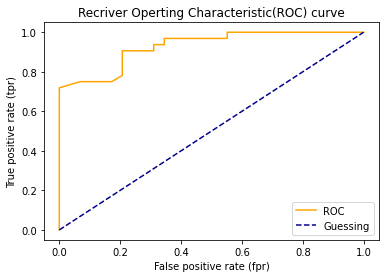

In [162]:
plot_roc_curve(fpr,tpr)

In [163]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9294181034482758

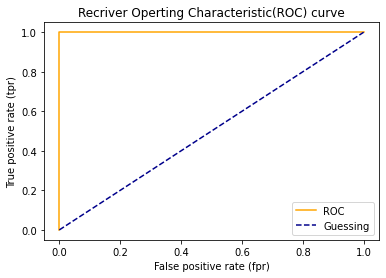

In [164]:
#plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [165]:
#perfect AOC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

 a confusion matrix is a quick way to compare the labels a model predicts and the actual data it was supposed to predict/

In [166]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[19, 10],
       [ 2, 30]])

In [167]:
#visualise confusion matrxi
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
           colnames = ['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,19,10
1,2,30


In [168]:
19+10+2+30

61

In [169]:
len(y_preds)

61

<AxesSubplot:>

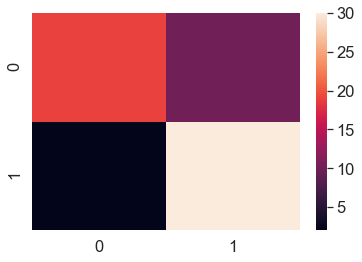

In [170]:
#make confusion matrix  heatmap with seaborn's heatmap()
import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#plot it using seaborn
sns.heatmap(conf_mat)

In [171]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, #annotate the boxes with confusion matrix info
                    cbar=False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    

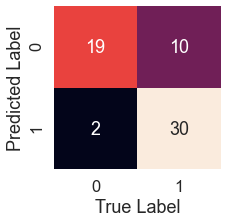

In [172]:
plot_conf_mat(conf_mat)

In [173]:
from sklearn.metrics import plot_confusion_matrix

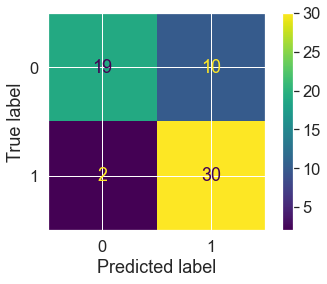

In [174]:
plot_confusion_matrix(clf, X_test,y_test)

### Classification Report

In [175]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76        29
           1       0.75      0.94      0.83        32

    accuracy                           0.80        61
   macro avg       0.83      0.80      0.80        61
weighted avg       0.82      0.80      0.80        61



**Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0

**Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.

**F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0

**Support** - number of samples each metrics is calculated on.

**Accuracy** - Perfect accuracy is 1.0

**Macro Avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into effort, so if you have class imbalances, pay attention to this metric.

**Weighted avg** - weighted avg scores, here number of samples are also important. It is calculated respect to number of samples.

In [177]:
#where precision and recall becomes valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) #model predicts every case as zero

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/Users/yogeshtak/Documents/Python3/datascience_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yogeshtak/Documents/Python3/datascience_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yogeshtak/Documents/Python3/datascience_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

   **Accuracy** - is a good measure to start with if all classes are balanced (eg same amount of samples which are labelled 0 or 1 <br>
   **Precision and recall** - become more important when classes are imbalanced. <br>
   if false positive predictions are worse than false negatives, aim for higher precision <br>
   if false negatives predictions are worse than false positives, aim for higher recall <br>
   **F1-Score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

1. R^2 (r-squared) or cofficient of determination
2. Mean absolute error (MAE)
3. Mean squared erroe (MSE)

**R^2** It comapres your models predictions to the mean of the targets. Values can range from negative infinity ( poor model) to 1. 

In [180]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(41)

X = boston_df.drop("target", axis =1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [181]:
model.score(X_test,y_test)

0.6094036656505765

In [182]:
from sklearn.metrics import r2_score

#fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04705882,
       21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04705882,
       21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04705882,
       21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04705882,
       21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04705882,
       21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04705882,
       21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04705882,
       21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04705882,
       21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04705882,
       21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04705882,
       21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04705882,
       21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04705882,
       21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04705882,
       21.04705882, 21.04705882, 21.04705882, 21.04705882, 21.04

In [183]:
r2_score(y_test, y_test_mean)

0.0

So, if all your model does is predict the mean of the targets, it's R squared value would be 0. And if your model perfectly predicts a range of numbers its r squared value would be 1

In [184]:
r2_score(y_test,y_test)

1.0

In [185]:
#checking r2 for our model
r2_score(y_test, model.predict(X_test))

0.6094036656505765

**Mean Absolute Error (MAE)**

It is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [187]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.570254901960784

In [192]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})

df["difference"] = df["predicted values"] - df["actual values"]
df["difference"].abs().mean() #making values absolute and then taking mean

2.570254901960784

**Mean Squared Error (MSE)**|

In [193]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)

mse

18.135748215686277

In [198]:
np.square(df["difference"]).mean()  #taking square of error and then taking mean

18.135748215686277

## 4.2 Using the `scoring` parameter

In [199]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)

X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [200]:
np.random.seed(1)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.80327869, 0.90163934, 0.80327869, 0.81666667, 0.76666667])

In [201]:
print(f"Mean cross validated accuracy is {np.mean(cv_acc)*100:.2f}%")

Mean cross validated accuracy is 81.83%


In [202]:
#changing scoring paramater to accuracy
np.random.seed(1)
cv_acc = cross_val_score(clf, X,y, cv=5, scoring="accuracy")
print(f"Mean cross validated accuracy is {np.mean(cv_acc)*100:.2f}%")

Mean cross validated accuracy is 81.83%


In [205]:
#changing scoring paramater to precision
np.random.seed(1)
cv_prec = cross_val_score(clf, X,y, cv=5, scoring="precision")
print(f"Mean cross validated accuracy is {np.mean(cv_prec)*100:.2f}%")

Mean cross validated accuracy is 83.23%


In [206]:
#changing scoring paramater to Recall
np.random.seed(1)
cv_recall = cross_val_score(clf, X,y, cv=5, scoring="recall")
print(f"Mean cross validated accuracy is {np.mean(cv_recall)*100:.2f}%")

Mean cross validated accuracy is 84.24%


In [207]:
#changing scoring paramater to Recall
np.random.seed(1)
cv_f1 = cross_val_score(clf, X,y, cv=5, scoring="recall")
print(f"Mean cross validated accuracy is {np.mean(cv_f1)*100:.2f}%")

Mean cross validated accuracy is 84.24%


**Regression Model**

In [208]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(1)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

model = RandomForestRegressor()

In [209]:
np.random.seed(1)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.6213985846161882

In [210]:
np.random.seed(1)
cv_r2 = cross_val_score(model, X, y , cv=5, scoring="r2")
np.mean(cv_r2)

0.6213985846161882

In [211]:
cv_r2

array([0.76508383, 0.85666735, 0.72982919, 0.47973754, 0.27567501])

In [212]:
np.random.seed(1)
cv_mae = cross_val_score(model, X, y , cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-3.01096342457775

In [213]:
cv_mae

array([-2.11847059, -2.55872277, -3.4110396 , -3.74726733, -3.21931683])

## 4.3  Using different evaluation metrics as Scikit-Learn functions

**Classification Evaluation Function**

In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(23)

X = heart_disease.drop('target', axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#predictions
y_preds = clf.predict(X_test)

#Evaluate the classifer
print(f"Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")

Classifier metrics on the test set
Accuracy: 80.33%
Precision: 0.7878787878787878
Recall: 0.8387096774193549
F1: 0.8125


**Regression evaluation function**

In [217]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(32)

X = boston_df.drop('target', axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

#make predictions
y_preds = model.predict(X_test)

#Evaluate the model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regression model metrics on the test set
R^2: 0.8599602153337615
MAE: 2.2269999999999994
MSE: 12.662693588235284


In [218]:
what_were_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

# 5. Improving a model

first prediction = baseline prediction
first model = baseline model

1. Could we collect more data? (generally, the more data, the better)
2. Could we improve our data? (maybe more features about each sample)
3. Is there a better model we could use?
4. Could we improve the current model? Adjusting hyperparamters

Parameters = model find these patterns in data <br>
hyperparameters = setting on a model you can adjust to potentially imporve its ability to find patterns

**Three ways to adjust hyperparameters**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [219]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [220]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}